In [289]:
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
import pandas as pd


In [290]:
workhr_southAsia_df = pd.read_csv('../data/South Asia occupation vs working hours.csv')
workhr_southAsia_df.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): Total,2021,39.62,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 1. Managers,2021,44.84,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 2. Professionals,2021,32.56,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 3. Technicians and assoc...,2021,40.29,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 4. Clerical support workers,2021,40.08,Unreliable,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...


In [291]:
workhr_southAsia_df.drop(columns=['source.label','indicator.label','classif1.label','obs_status.label','note_classif.label','note_indicator.label','note_source.label'], inplace = True)

In [292]:
workhr_southAsia_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
0,Afghanistan,Sex: Total,Occupation (ISCO-08): Total,2021,39.62
1,Afghanistan,Sex: Total,Occupation (ISCO-08): 1. Managers,2021,44.84
2,Afghanistan,Sex: Total,Occupation (ISCO-08): 2. Professionals,2021,32.56
3,Afghanistan,Sex: Total,Occupation (ISCO-08): 3. Technicians and assoc...,2021,40.29
4,Afghanistan,Sex: Total,Occupation (ISCO-08): 4. Clerical support workers,2021,40.08


In [293]:
workhr_southAsia_df['classif2.label'] = workhr_southAsia_df['classif2.label'].str.split(':')
workhr_southAsia_df['classif2.label'] = workhr_southAsia_df['classif2.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
workhr_southAsia_df["classif2.label"] = workhr_southAsia_df["classif2.label"].str.strip().str.replace(r"^\d+\.\s*", "", regex=True)

In [294]:
workhr_southAsia_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
0,Afghanistan,Sex: Total,Total,2021,39.62
1,Afghanistan,Sex: Total,Managers,2021,44.84
2,Afghanistan,Sex: Total,Professionals,2021,32.56
3,Afghanistan,Sex: Total,Technicians and associate professionals,2021,40.29
4,Afghanistan,Sex: Total,Clerical support workers,2021,40.08


In [295]:
workhr_southAsia_df['sex.label'] = workhr_southAsia_df['sex.label'].str.split(':')
workhr_southAsia_df['sex.label'] = workhr_southAsia_df['sex.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
workhr_southAsia_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
0,Afghanistan,Total,Total,2021,39.62
1,Afghanistan,Total,Managers,2021,44.84
2,Afghanistan,Total,Professionals,2021,32.56
3,Afghanistan,Total,Technicians and associate professionals,2021,40.29
4,Afghanistan,Total,Clerical support workers,2021,40.08


In [296]:
workhr_southAsia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16907 entries, 0 to 16906
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  16907 non-null  object 
 1   sex.label       16907 non-null  object 
 2   classif2.label  16907 non-null  object 
 3   time            16907 non-null  int64  
 4   obs_value       16086 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 660.6+ KB


In [297]:
workhr_southAsia_df.isnull().sum()

ref_area.label      0
sex.label           0
classif2.label      0
time                0
obs_value         821
dtype: int64

In [298]:
workhr_southAsia_df['obs_value'] = workhr_southAsia_df.groupby('ref_area.label')['obs_value'].transform(lambda x: x.fillna(x.mean()))

In [299]:
workhr_southAsia_df.isnull().sum()

ref_area.label    0
sex.label         0
classif2.label    0
time              0
obs_value         0
dtype: int64

In [300]:
workhr_nepal_df = workhr_southAsia_df[workhr_southAsia_df['ref_area.label'] == 'Nepal'].reset_index(drop=True)

In [301]:
workhr_nepal_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
0,Nepal,Total,Total,2017,41.04
1,Nepal,Total,Managers,2017,44.23
2,Nepal,Total,Professionals,2017,37.86
3,Nepal,Total,Technicians and associate professionals,2017,42.10
4,Nepal,Total,Clerical support workers,2017,40.88


In [302]:
workhr_southAsia_df['classif2.label'].unique()

array(['Total', 'Managers', 'Professionals',
       'Technicians and associate professionals',
       'Clerical support workers', 'Service and sales workers',
       'Skilled agricultural, forestry and fishery workers',
       'Craft and related trades workers',
       'Plant and machine operators, and assemblers',
       'Elementary occupations', 'Armed forces occupations',
       'X. Not elsewhere classified',
       'Legislators, senior officials and managers', 'Clerks',
       'Service workers and shop and market sales workers',
       'Skilled agricultural and fishery workers',
       'Plant and machine operators and assemblers', 'Armed forces'],
      dtype=object)

In [303]:
nepal_occupations = workhr_nepal_df['classif2.label'].unique()
workhr_southAsia_df = workhr_southAsia_df[workhr_southAsia_df['classif2.label'].isin(nepal_occupations)]
workhr_southAsia_df['classif2.label'].unique()

array(['Total', 'Managers', 'Professionals',
       'Technicians and associate professionals',
       'Clerical support workers', 'Service and sales workers',
       'Skilled agricultural, forestry and fishery workers',
       'Craft and related trades workers',
       'Plant and machine operators, and assemblers',
       'Elementary occupations', 'Armed forces occupations',
       'Legislators, senior officials and managers', 'Clerks',
       'Service workers and shop and market sales workers',
       'Skilled agricultural and fishery workers',
       'Plant and machine operators and assemblers', 'Armed forces'],
      dtype=object)

In [304]:
workhr_southAsia_df['classif2.label'] = workhr_southAsia_df['classif2.label'].replace(['Clerks','Legislators, senior officials and managers','Service workers and shop and market sales workers','Skilled agricultural and fishery workers','Plant and machine operators and assemblers'],['Clerical support workers','Managers','Service and sales workers','Skilled agricultural, forestry and fishery workers','Plant and machine operators, and assemblers'])

In [305]:
workhr_southAsia_df['ref_area.label'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India',
       'Iran (Islamic Republic of)', 'Sri Lanka', 'Maldives', 'Nepal',
       'Pakistan'], dtype=object)

In [306]:
workhr_southAsia_df = workhr_southAsia_df[workhr_southAsia_df['ref_area.label'] != 'Iran (Islamic Republic of)']


### Lets only compare the data of year 2018 or close for all the countries

In [307]:
workhr_southAsia_2018_df = workhr_southAsia_df[workhr_southAsia_df['time'].isin([2016,2017,2018,2019])].reset_index(drop = True)
workhr_southAsia_2018_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
0,Afghanistan,Total,Total,2017,37.96
1,Afghanistan,Total,Managers,2017,45.51
2,Afghanistan,Total,Professionals,2017,33.94
3,Afghanistan,Total,Technicians and associate professionals,2017,43.40
4,Afghanistan,Total,Clerical support workers,2017,46.85


In [308]:
workhr_southAsia_2018_df['ref_area.label'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka',
       'Maldives', 'Nepal', 'Pakistan'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'Bhutan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Sri Lanka'),
  Text(5, 0, 'Maldives'),
  Text(6, 0, 'Nepal'),
  Text(7, 0, 'Pakistan')])

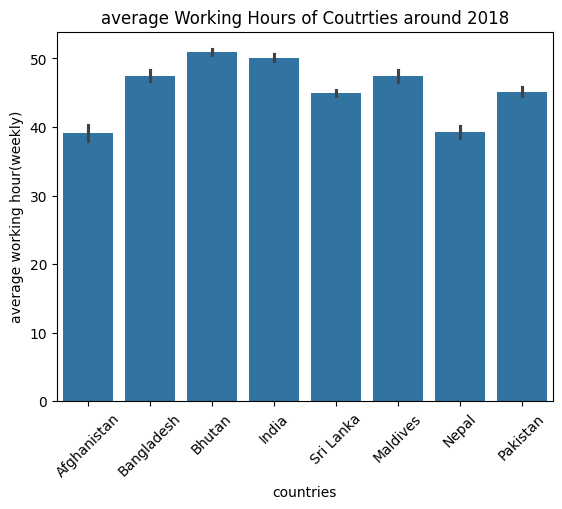

In [309]:

sns.barplot(data=workhr_southAsia_2018_df, x = 'ref_area.label', y = 'obs_value')
plot.title('average Working Hours of Coutrties around 2018')
plot.xlabel('countries')
plot.ylabel('average working hour(weekly)')
plot.xticks(rotation = 45)

/Users/prabesh/Data Science Project/work_salary_analysis/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 3000x1000 with 0 Axes>

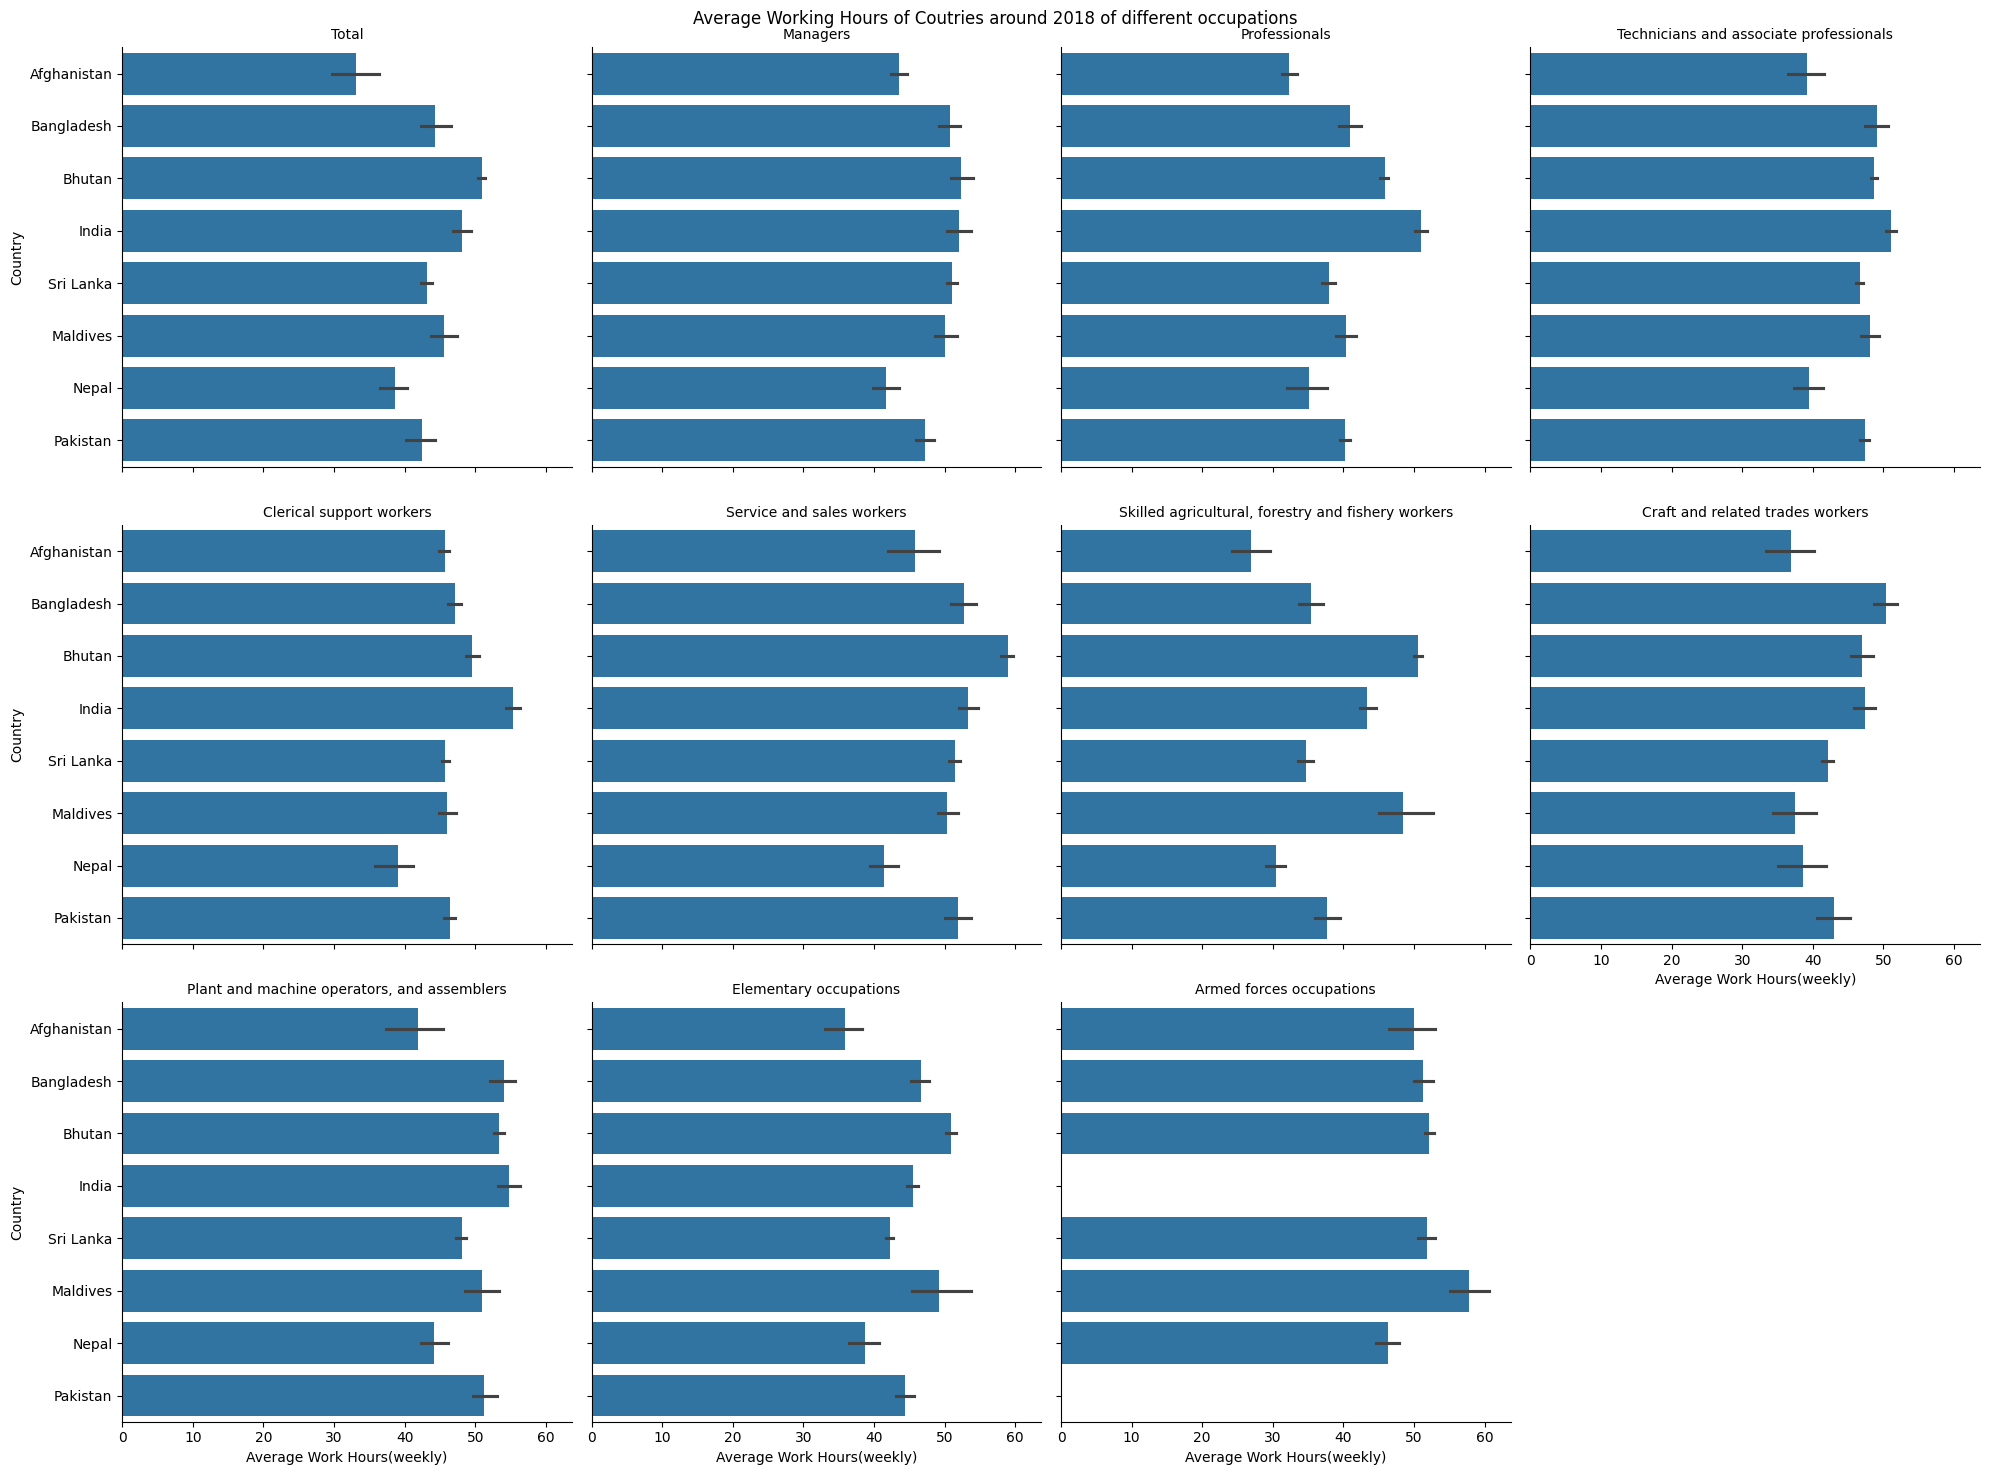

In [310]:
plot.figure(figsize=(30,10))
# Create a FacetGrid with separate plots for each occupation
g = sns.FacetGrid(workhr_southAsia_2018_df, col="classif2.label", col_wrap=4, height=5)  # Adjust col_wrap to control number of plots per row
g.map(sns.barplot, 'obs_value', 'ref_area.label')

# Add labels and title
g.set_axis_labels('Average Work Hours(weekly)', 'Country')
g.set_titles("{col_name}")

# Show the plots
plot.suptitle('Average Working Hours of Coutries around 2018 of different occupations')
plot.tight_layout()
plot.show()

In [311]:
earning_southAsia_df = pd.read_csv('../data/South Asia occupation vs salary.csv')

In [312]:
earning_southAsia_df.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,LFS - Labour Force Survey,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): Total,Currency: U.S. dollars,2020,171.874,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,LFS - Labour Force Survey,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 1. Managers,Currency: U.S. dollars,2020,238.742,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,LFS - Labour Force Survey,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 2. Professionals,Currency: U.S. dollars,2020,161.891,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,LFS - Labour Force Survey,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 3. Technicians and assoc...,Currency: U.S. dollars,2020,166.590,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,LFS - Labour Force Survey,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 4. Clerical support workers,Currency: U.S. dollars,2020,209.459,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...


In [313]:
earning_southAsia_df.drop(columns=['source.label','indicator.label','classif2.label','obs_status.label','note_classif.label','note_indicator.label','note_source.label'], inplace = True)

In [314]:
earning_southAsia_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Total,Occupation (ISCO-08): Total,2020,171.874
1,Afghanistan,Sex: Total,Occupation (ISCO-08): 1. Managers,2020,238.742
2,Afghanistan,Sex: Total,Occupation (ISCO-08): 2. Professionals,2020,161.891
3,Afghanistan,Sex: Total,Occupation (ISCO-08): 3. Technicians and assoc...,2020,166.590
4,Afghanistan,Sex: Total,Occupation (ISCO-08): 4. Clerical support workers,2020,209.459


In [315]:
earning_southAsia_df['classif1.label'] = earning_southAsia_df['classif1.label'].str.split(':')
earning_southAsia_df['classif1.label'] = earning_southAsia_df['classif1.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
earning_southAsia_df["classif1.label"] = earning_southAsia_df["classif1.label"].str.strip().str.replace(r"^\d+\.\s*", "", regex=True)

In [316]:
earning_southAsia_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Total,Total,2020,171.874
1,Afghanistan,Sex: Total,Managers,2020,238.742
2,Afghanistan,Sex: Total,Professionals,2020,161.891
3,Afghanistan,Sex: Total,Technicians and associate professionals,2020,166.590
4,Afghanistan,Sex: Total,Clerical support workers,2020,209.459


In [317]:
earning_southAsia_df['sex.label'] = earning_southAsia_df['sex.label'].str.split(':')
earning_southAsia_df['sex.label'] = earning_southAsia_df['sex.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x)>1 else None)

In [318]:
earning_southAsia_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Total,Total,2020,171.874
1,Afghanistan,Total,Managers,2020,238.742
2,Afghanistan,Total,Professionals,2020,161.891
3,Afghanistan,Total,Technicians and associate professionals,2020,166.590
4,Afghanistan,Total,Clerical support workers,2020,209.459


In [319]:
earning_southAsia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  1648 non-null   object 
 1   sex.label       1648 non-null   object 
 2   classif1.label  1648 non-null   object 
 3   time            1648 non-null   int64  
 4   obs_value       1648 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 64.5+ KB


In [320]:
earning_southAsia_df = earning_southAsia_df[earning_southAsia_df['classif1.label'].isin(nepal_occupations)]
earning_southAsia_df['classif1.label'] = earning_southAsia_df['classif1.label'].replace(['Clerks','Legislators, senior officials and managers','Service workers and shop and market sales workers','Skilled agricultural and fishery workers','Plant and machine operators and assemblers'],['Clerical support workers','Managers','Service and sales workers','Skilled agricultural, forestry and fishery workers','Plant and machine operators, and assemblers'])

In [321]:
earning_southAsia_2018__df = earning_southAsia_df[earning_southAsia_df['time'].isin([2016,2017,2018,2019,2020])]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'Bhutan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Sri Lanka'),
  Text(5, 0, 'Maldives'),
  Text(6, 0, 'Nepal'),
  Text(7, 0, 'Pakistan')])

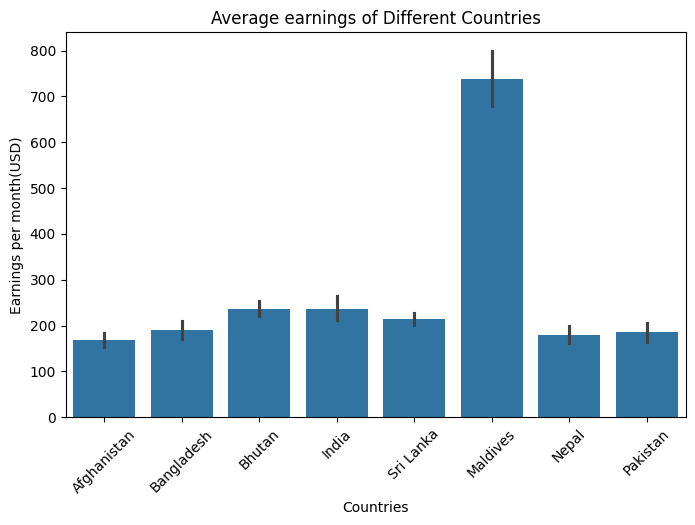

In [322]:
plot.figure(figsize=(8,5))
sns.barplot(data = earning_southAsia_2018__df, x = 'ref_area.label', y = 'obs_value')
plot.title('Average earnings of Different Countries')
plot.xlabel('Countries')
plot.ylabel('Earnings per month(USD)')
plot.xticks(rotation = 45)

/Users/prabesh/Data Science Project/work_salary_analysis/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 3000x1000 with 0 Axes>

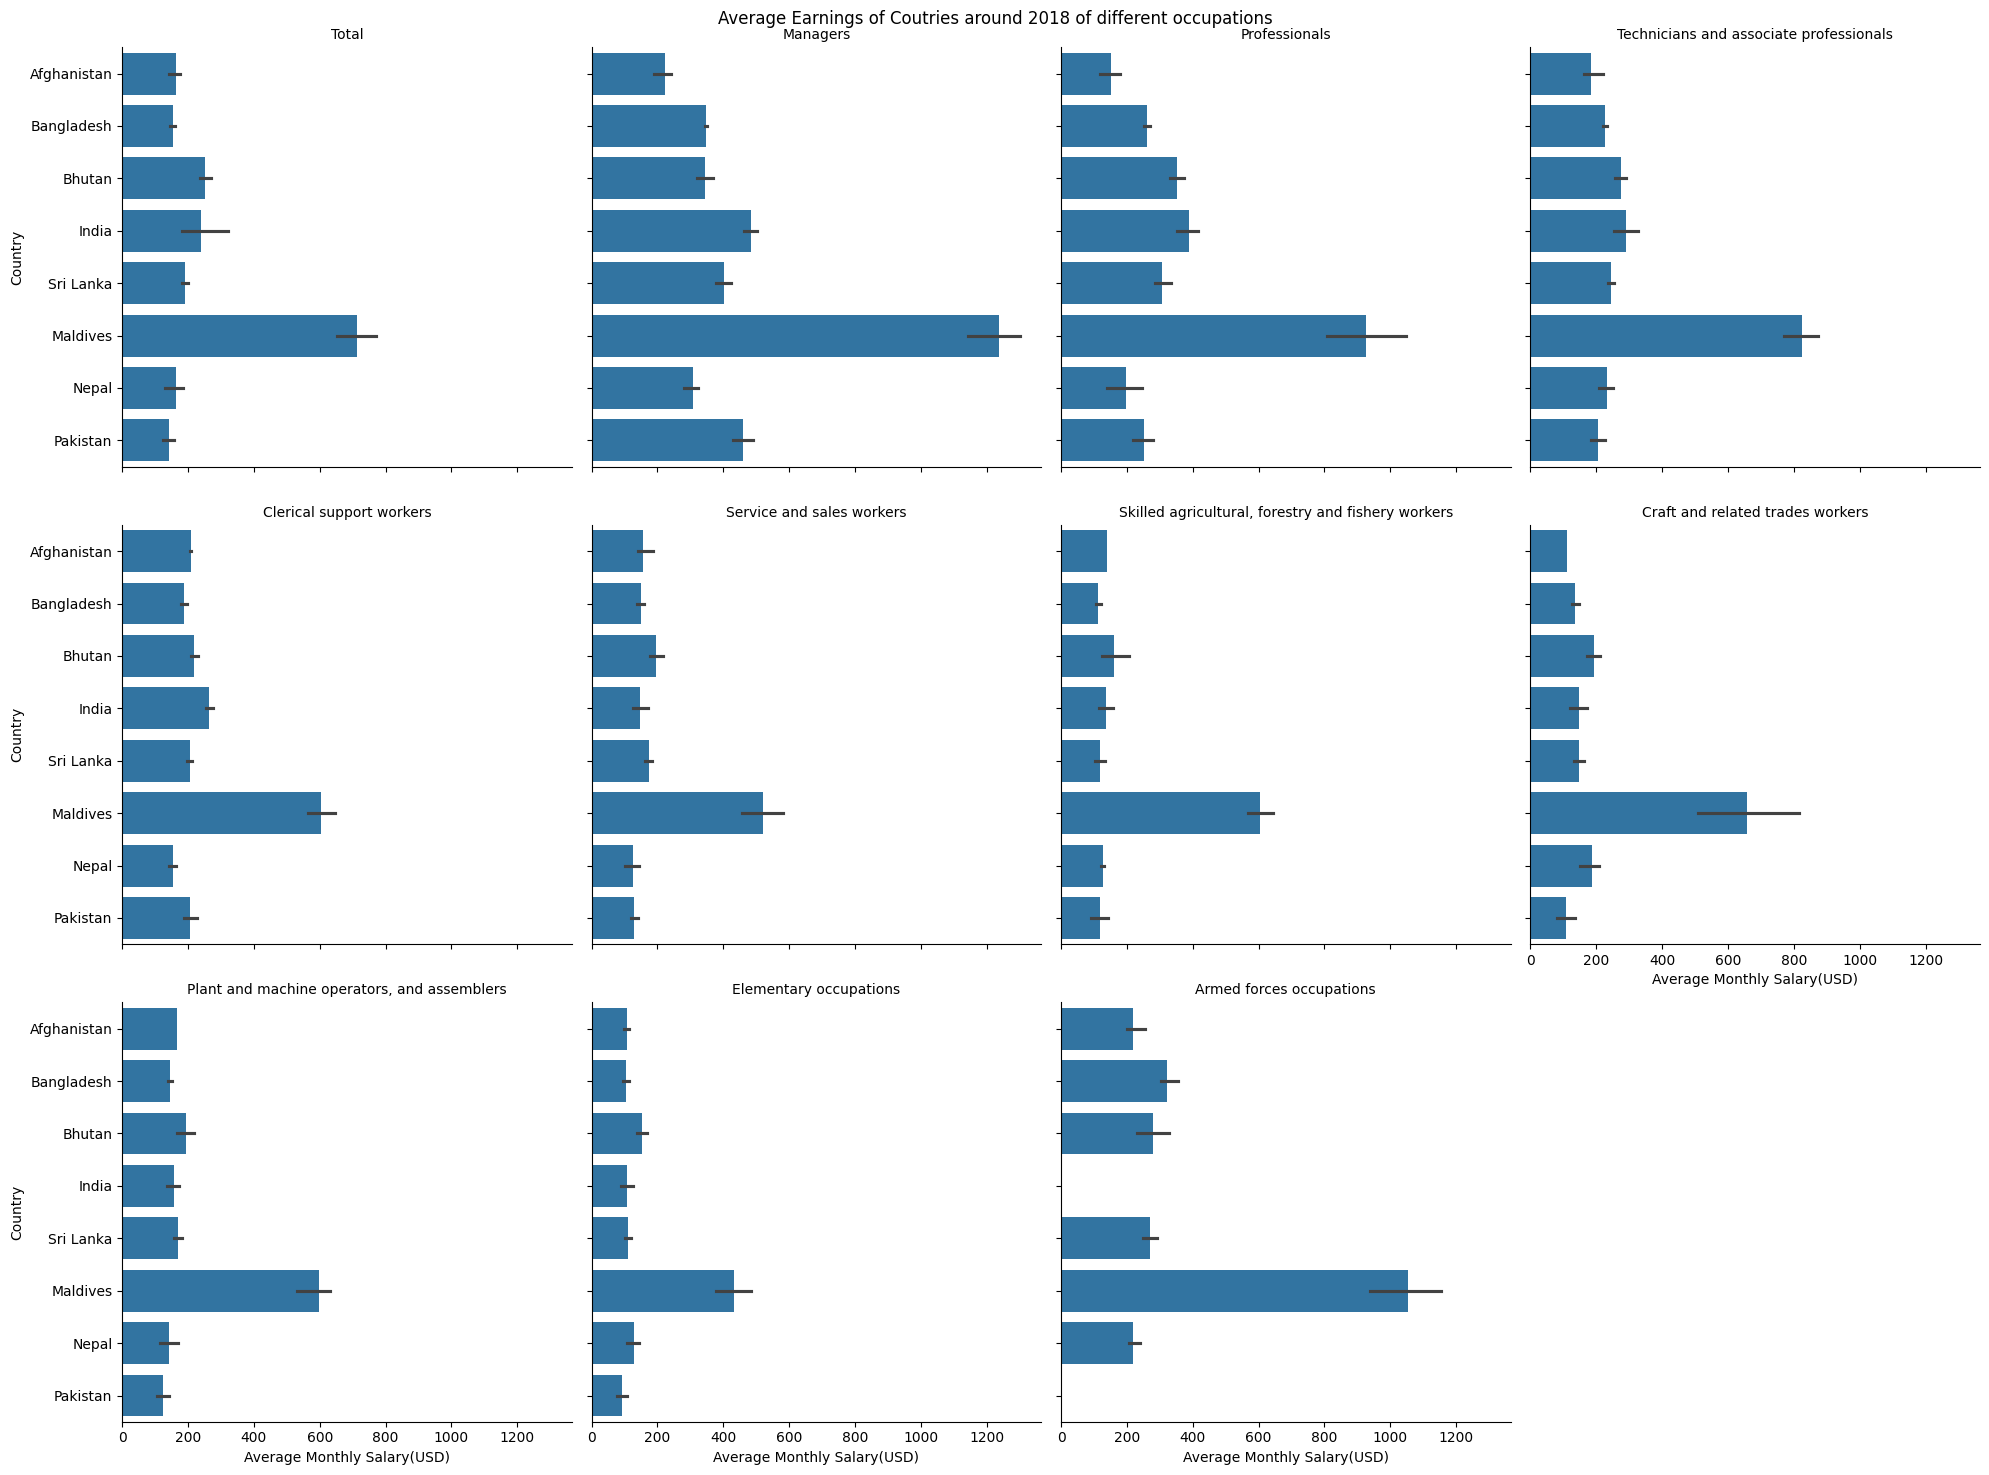

In [323]:
plot.figure(figsize=(30,10))
# Create a FacetGrid with separate plots for each occupation
g = sns.FacetGrid(earning_southAsia_2018__df, col="classif1.label", col_wrap=4, height=5)  # Adjust col_wrap to control number of plots per row
g.map(sns.barplot, 'obs_value', 'ref_area.label')

# Add labels and title
g.set_axis_labels('Average Monthly Salary(USD)', 'Country')
g.set_titles("{col_name}")

# Show the plots
plot.suptitle('Average Earnings of Coutries around 2018 of different occupations')
plot.tight_layout()
plot.show()

### Now lets Analyze earnings trends over the years

<Axes: xlabel='time', ylabel='obs_value'>

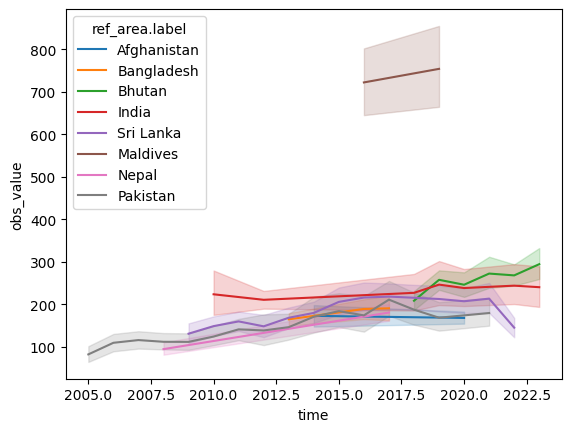

In [324]:
sns.lineplot(data = earning_southAsia_df, x = 'time', y = 'obs_value', hue = 'ref_area.label')